<a href="https://colab.research.google.com/github/Manvi1718/Pytorch/blob/main/ANN_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [558]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import torch
from torch import nn
from sklearn.model_selection import train_test_split

In [559]:
data , target = make_circles(n_samples = 1000,noise = 0.03,random_state=10)

In [560]:
data[:5]

array([[-0.31031434, -0.68316883],
       [ 0.65484283, -0.40810234],
       [ 0.72067081,  0.42182061],
       [-0.54407753,  0.81163728],
       [-0.81208571, -0.14351782]])

In [561]:
target[:5]

array([1, 1, 1, 0, 1])

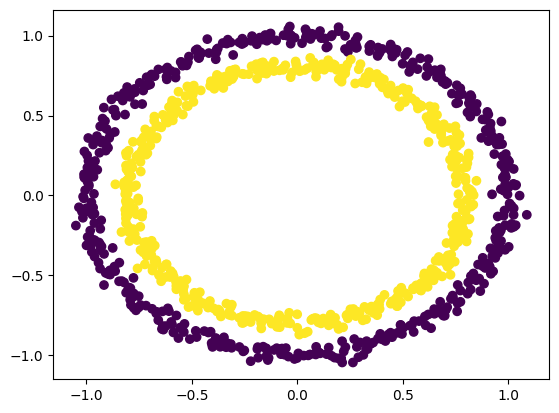

In [562]:
plt.scatter(data[:,0],data[:,1],c=target)
plt.show()

In [563]:
# convert numpy array into tensor 
X=torch.from_numpy(data).type(torch.float)
y=torch.from_numpy(target).type(torch.float)

In [564]:
# 25 percent data to testing 
# we apply DL on training data and test using testing data
x_train , x_test , y_train , y_test =train_test_split(X,y,test_size=0.25)

In [565]:
X.shape

torch.Size([1000, 2])

In [566]:
x_train.shape

torch.Size([750, 2])

In [567]:
# building model

In [568]:
# setup GPU for DL model
device = "cuda" if torch.cuda.is_available() else "cpu"

In [569]:
device

'cpu'

In [570]:
class Model(nn.Module):
  # constructor of our class
  def __init__(self):
    # calling parent class constructor
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=6)
    self.layer_2 = nn.Linear(in_features=6, out_features=4)
    self.layer_3 = nn.Linear(in_features=4, out_features=1)
    self.activation = nn.ReLU()
  def forward(self, input_data):
    x = self.activation(self.layer_1(input_data))
    x = self.activation(self.layer_2(x))
    return self.layer_3(x)

In [571]:
# making object of our model
model = Model().to(device)

In [572]:
model

Model(
  (layer_1): Linear(in_features=2, out_features=6, bias=True)
  (layer_2): Linear(in_features=6, out_features=4, bias=True)
  (layer_3): Linear(in_features=4, out_features=1, bias=True)
  (activation): ReLU()
)

In [573]:

# BACK PROPAGATION 

In [574]:
loss = nn.BCEWithLogitsLoss()

#optimizer = torch.optim.SGD(params = model.parameters(),lr = 0.1)

optimizer = torch.optim.Adam(params = model.parameters(),lr = 0.1)

In [575]:
def accuracy(y_true , y_pred):
  # y_true = 1, y_pred = 1
  # y_true = 0, y_pred = 0
  correct_classification = torch.eq(y_true, y_pred).sum().item()
  acc = (correct_classification  / len(y_pred)) *100
  return acc

In [576]:
epochs = 130

# it will train on the device that we selected 
x_train , y_train = x_train.to(device) , y_train.to(device)
x_test , y_test = x_test.to(device) , y_test.to(device)

for epoch in range(epochs):
  # training model 
  model.train()

  # apply feedforward
  y_logits = model(x_train).squeeze()

  # get predictions on training data
  y_pred = torch.round(torch.sigmoid(y_logits))

  # now find out loss
  # apply binary cross entropy to get loss
      # loss(prediction , actual)
  train_loss = loss(y_logits,y_train)
  acc = accuracy(y_train,y_pred)

  # apply optimisation
  optimizer.zero_grad()

  # backpropagation
  train_loss.backward()

  optimizer.step()

  # model evaluation 
  model.eval()

  with torch.inference_mode():
    y_pred_test= model(x_test).squeeze()
    test_pred = torch.round(torch.sigmoid(y_pred_test))
    test_loss = loss(y_pred_test,y_test)
    test_acc = accuracy(y_test,test_pred)
  if epoch % 10== 0:
    print(f"epoch :{epoch} | train loss: {train_loss:.4f} | train accuracy : {acc:.2f} | test loss : {test_loss:.4f} | test acc {test_acc:.2f}")


epoch :0 | train loss: 0.7292 | train accuracy : 49.20 | test loss : 0.6966 | test acc 52.40
epoch :10 | train loss: 0.6828 | train accuracy : 73.87 | test loss : 0.6814 | test acc 75.60
epoch :20 | train loss: 0.6262 | train accuracy : 78.93 | test loss : 0.6116 | test acc 78.00
epoch :30 | train loss: 0.5038 | train accuracy : 72.00 | test loss : 0.4638 | test acc 76.40
epoch :40 | train loss: 0.3357 | train accuracy : 95.73 | test loss : 0.3237 | test acc 97.20
epoch :50 | train loss: 0.2094 | train accuracy : 97.33 | test loss : 0.2014 | test acc 96.80
epoch :60 | train loss: 0.1413 | train accuracy : 97.33 | test loss : 0.1480 | test acc 96.80
epoch :70 | train loss: 0.1074 | train accuracy : 97.87 | test loss : 0.1149 | test acc 97.20
epoch :80 | train loss: 0.0877 | train accuracy : 98.40 | test loss : 0.0981 | test acc 97.60
epoch :90 | train loss: 0.0757 | train accuracy : 98.80 | test loss : 0.0924 | test acc 97.60
epoch :100 | train loss: 0.0700 | train accuracy : 98.80 | te

In [577]:
y_train[:5]

tensor([0., 0., 1., 1., 1.])

In [578]:
y_pred[:5]

tensor([0., 0., 1., 1., 1.], grad_fn=<SliceBackward0>)

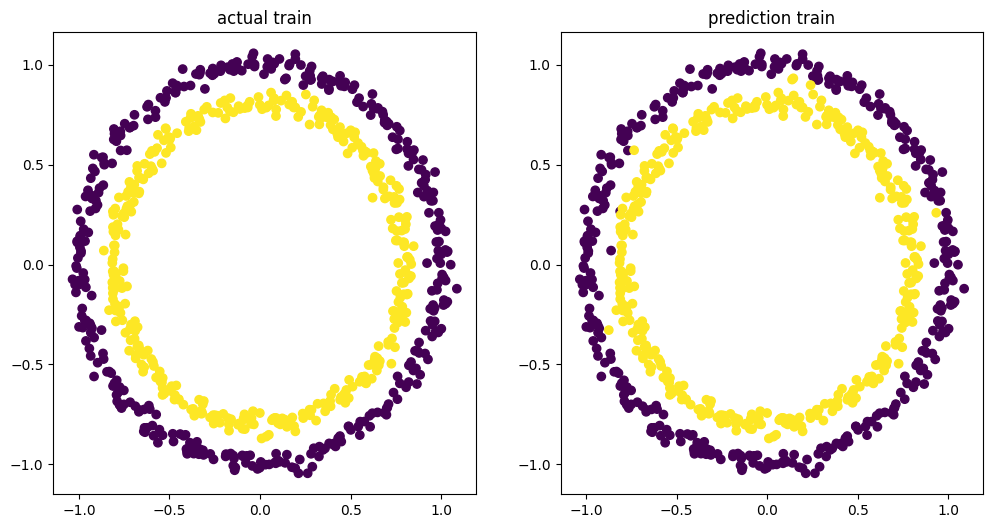

In [579]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("actual train")
plt.scatter(x_train[:,0],x_train[:,1],c = y_train)
plt.subplot(1,2,2)
plt.title("prediction train")
plt.scatter(x_train[:,0],x_train[:,1],c = y_pred.detach().numpy())
plt.show()

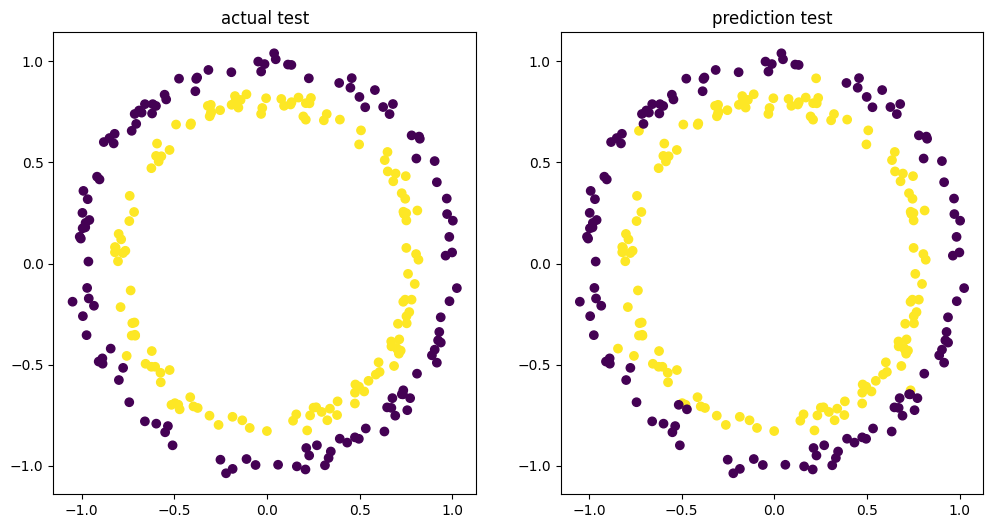

In [584]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("actual test")
plt.scatter(x_test[:,0],x_test[:,1],c = y_test)
plt.subplot(1,2,2)
plt.title("prediction test")
plt.scatter(x_test[:,0],x_test[:,1],c = test_pred.detach().numpy())
plt.show()